Run in google colab, if you are facing issues

In [1]:
# prompt: get the MNIST dataset for me, after that select only the records that correspond to the number 1,2  and 3

import tensorflow as tf

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Select records for numbers 1, 2, and 3
train_indices = (y_train == 1) | (y_train == 2) | (y_train == 3)
x_train_filtered = x_train[train_indices]
y_train_filtered = y_train[train_indices]

# You can do the same for the test data if needed
test_indices = (y_test == 1) | (y_test == 2) | (y_test == 3)
x_test_filtered = x_test[test_indices]
y_test_filtered = y_test[test_indices]


ModuleNotFoundError: No module named 'tensorflow'

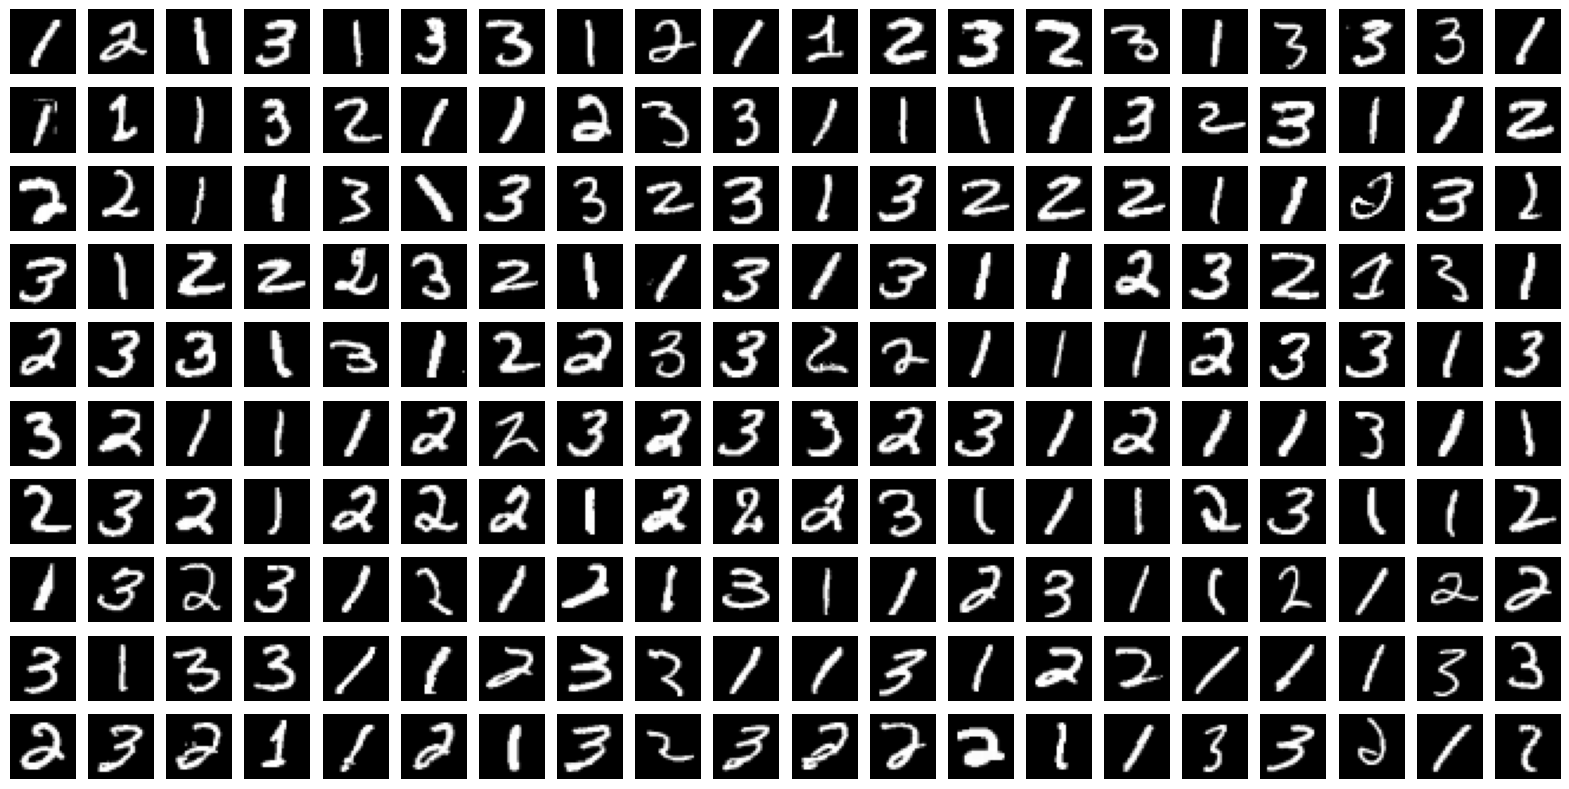

In [17]:
# prompt: view the first 200 images of x_train_filtered

import matplotlib.pyplot as plt

# Display the first 200 images
plt.figure(figsize=(20, 10))
for i in range(200):
    plt.subplot(10, 20, i + 1)
    plt.imshow(x_train_filtered[i], cmap='gray')
    plt.axis('off')
plt.show()


In [14]:
y_train

array([1, 2, 1, ..., 2, 2, 1], dtype=uint8)

In [20]:
# prompt: apply kMeans on x_train_filtered, divide into 3 groups

from sklearn.cluster import KMeans
import numpy as np

# Flatten the images
x_train_flattened = x_train_filtered.reshape(x_train_filtered.shape[0], -1)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_train_flattened)

# Get the cluster labels for each image
labels = kmeans.labels_



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# prompt: for x_train_flattened, use PCA to bring it down to 2 dimensions. Plot  the points. Show the lables obtained by kMeans in a different colour. Also, show the corresponding y_train_filtered values with different shapes

from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flattened)


In [24]:
# prompt: make a pandas data frame having columns of x_train_pca. Add the cluster labels and y_train_filtered as two more columns

import pandas as pd

# Create a DataFrame with PCA components
df = pd.DataFrame(data=x_train_pca, columns=['PC1', 'PC2'])

# Add the cluster labels
df['Cluster'] = labels

# Add the original labels
df['Original_Label'] = y_train_filtered
df

,PC1,PC2,Cluster,Original_Label
0,-444.940274,-642.095316,2,1
1,586.702375,-667.947297,0,2
2,-664.478809,325.426387,2,1
3,1086.852559,342.874450,1,3
4,-908.591008,192.263531,2,1
...,...,...,...,...
18826,-260.476223,-637.183801,2,1
18827,668.051701,-1227.914635,0,2
18828,111.363802,-1046.525678,0,2
18829,-605.166896,-418.050870,2,1


Text(0.5, 1.0, 'Plot with Shapes and Colors for Different Labels')

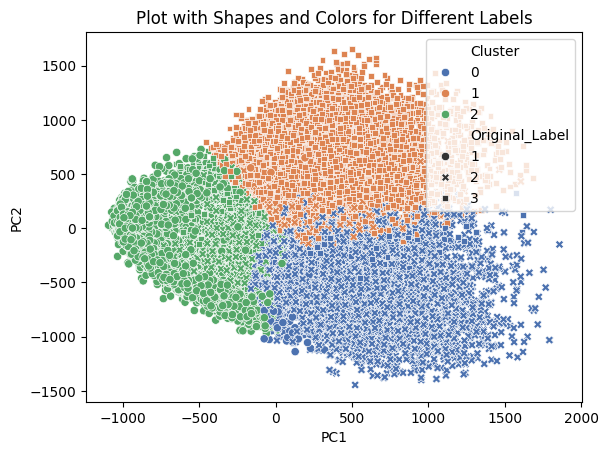

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', style='Original_Label',palette="deep")

# Adding labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Plot with Shapes and Colors for Different Labels')


In [27]:
# prompt: for x_train_flat, use LDA to bring it down to 2 dimensions. Plot  the points. Show the lables obtained by kMeans in a different colour. Also, show the corresponding y_train_filtered values with different shapes. Use seaborn library for plotting

import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA to reduce to 2 dimensions
lda = LinearDiscriminantAnalysis(n_components=2)
x_train_lda = lda.fit_transform(x_train_flattened, y_train_filtered)




In [29]:
# prompt: make a pandas data frame having columns of x_train_lda. Add the cluster labels and y_train_filtered as two more columns

# Create a DataFrame with LDA components
df_lda = pd.DataFrame(data=x_train_lda, columns=['LDA1', 'LDA2'])

# Add the cluster labels
df_lda['Cluster'] = labels

# Add the original labels
df_lda['Original_Label'] = y_train_filtered
df_lda


,LDA1,LDA2,Cluster,Original_Label
0,-3.501541,0.032320,2,1
1,0.944301,-2.110767,0,2
2,-3.084646,0.645988,2,1
3,3.012512,2.387190,1,3
4,-3.902888,0.632878,2,1
...,...,...,...,...
18826,-2.927950,0.285020,2,1
18827,1.636230,-3.376994,0,2
18828,0.909151,-2.948394,0,2
18829,-2.720597,-0.370585,2,1


Text(0.5, 1.0, 'Plot with Shapes and Colors for Different Labels')

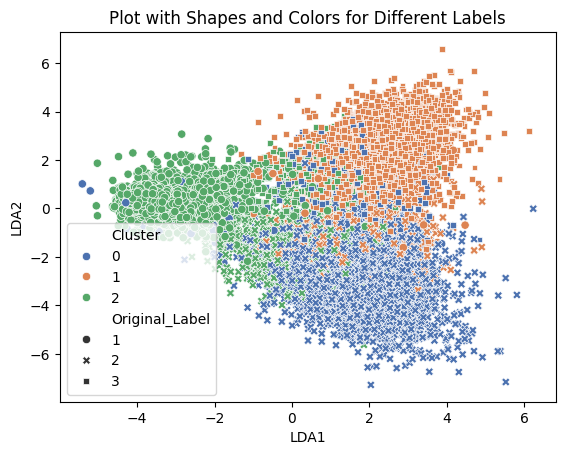

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_lda, x='LDA1', y='LDA2', hue='Cluster', style='Original_Label',palette="deep")

# Adding labels and title
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.title('Plot with Shapes and Colors for Different Labels')